# Exercise 02

Integrante 1: Andrea Carolina Parra_________________ 	Código: 201727740_____________

Integrante 2: Ricardo Andrés Medina________________ 	Código: 201628949_____________ 

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [3]:
income.shape


(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

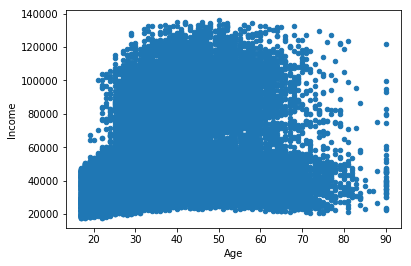

In [4]:
income.plot(x='Age', y='Income', kind='scatter')

Al observar la gráfica no se identifica claramente una relación entre los datos, aunque podría existir una relación lineal entre ellos,
por ello se prueba un modelo de regresión lineal

In [5]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
x=income['Age']
y=income['Income']
Reg.fit(x[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Parámetros de la regresión
print("Pendiente: "+str(Reg.coef_))
print("Intercepto: "+str(Reg.intercept_))


Pendiente: [542.16765707]
Intercepto: 32538.088130868535


Si la edad aumenta en un año, el ingreso aumenta en $542.17 dólares

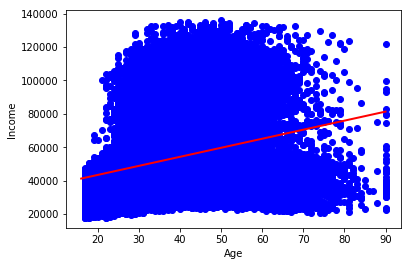

In [7]:
x_new = np.linspace(16, 90, 100)
y_new = Reg.predict(x_new[:, None])
plt.plot(x, y, 'bo')
plt.xlabel("Age")
plt.ylabel("Income")
plt.plot(x_new, y_new, color='red', linewidth=2)

# Exercise 2.2
Evaluate the model using the MSE

In [8]:
from sklearn import metrics
import numpy as np
y_pred = Reg.predict(x[:, None])
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 19027.65431399725
MSE: 593783043.8402297
RMSE: 24367.663897883805


El MSE estimado para el modelo de regresión lineal es 59.378.043, lo cual evidencia que posiblemente no sea el mejor modelo para explicar los datos


# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [9]:
# import
from sklearn.linear_model import LinearRegression

In [10]:
x=pd.DataFrame(x, columns=['Age','Age2'])
x.head()
x2=x.Age
x2.head()

0    39
1    50
2    38
3    53
4    28
Name: Age, dtype: int64

In [11]:
x.Age2=x2*x2
x.Age2.head()

0    1521
1    2500
2    1444
3    2809
4     784
Name: Age2, dtype: int64

In [12]:
x.head()

,Age,Age2
0,39,1521
1,50,2500
2,38,1444
3,53,2809
4,28,784


In [13]:
n_samples = x.shape[0]
X_ = np.c_[np.ones(n_samples), x]

In [14]:
# Fit
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
beta

array([-16225.07097408,   3131.77014151,    -30.54341041])

In [15]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [16]:
linreg.coef_

array([-16225.07097407,   3131.77014151,    -30.54341041])

La regresión que se obtiene contienen tres parámetros 

In [17]:
print("Intercepto:"+str(linreg.coef_[0]))
print("         X:"+str(linreg.coef_[1]))
print("       X_2:"+str(linreg.coef_[2]))

Intercepto:-16225.07097407011
         X:3131.7701415053743
       X_2:-30.543410412018602


# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

Se considera ahora una regresión lineal incluyendo las variables edad, sexo y raza

In [18]:
x3=pd.get_dummies(income.iloc[:,[8,9]])
x3['Age']=income.iloc[:,[0]]
x3.head()

,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male,Age
0,0,0,0,0,1,0,1,39
1,0,0,0,0,1,0,1,50
2,0,0,0,0,1,0,1,38
3,0,0,1,0,0,0,1,53
4,0,0,1,0,0,1,0,28


In [19]:
x3=pd.DataFrame(x3, columns=['Race_Amer-Indian-Eskimo','Race_Asian-Pac-Islander','Race_Black','Race_White','Sex_Female','Age'])
x3.head()

,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_White,Sex_Female,Age
0,0,0,0,1,0,39
1,0,0,0,1,0,50
2,0,0,0,1,0,38
3,0,0,1,0,0,53
4,0,0,1,0,1,28


In [20]:
n_samples = x.shape[0]
X_ = np.c_[np.ones(n_samples), x3]

In [21]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [22]:
linreg.coef_

array([ 3.65221868e+04, -1.46599394e+01,  9.25761665e+03,  1.49620839e+03,
        6.52246501e+03, -2.19430224e+04,  4.71246590e+02])

In [23]:
from sklearn import metrics
import numpy as np
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)
y_pred = lr_h(linreg.coef_, X_)
y_pred
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 16838.585334603154
MSE: 481130072.3876217
RMSE: 21934.677394199844


En este caso el MSE disminuye luego esta regresión tiene un mejor ajuste que la primera evaluada

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [24]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

Nótese que la clasificación se encuentra desbalanceada.
Se presenta una regresión logistica que incluye el sexo y la edad y la raza

In [25]:
# Regresión logistica
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['Race_Amer-Indian-Eskimo','Race_Asian-Pac-Islander','Race_Black','Race_White','Sex_Female','Age']
X = x3[feature_cols]
y = income.isUS
logreg.fit(X, y)
income['isUS2'] = logreg.predict(X)

In [26]:
income[['isUS','isUS2']].head()

,isUS,isUS2
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0


In [27]:
pd.pivot_table(income, values='Age', index=['isUS'], columns=['isUS2'], aggfunc=np.sum)

isUS2,0.0,1.0
isUS,,
0.0,32731,95940
1.0,14493,1113093


In [30]:
from sklearn.metrics import f1_score
f1_score(income['isUS'], income['isUS2'])

0.951523774858542

El modelo cuenta con una alta  precisión 0.95.